In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import font_manager
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

In [2]:
# Read data from the Excel file
df = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='Load', header=1)

In [3]:
#Extract data columns
years = df.iloc[:, 0].tolist()
electric_load = df.iloc[:, 1].tolist()
cooling_load = df.iloc[:, 2].tolist()
heat_load = df.iloc[:, 3].tolist()
hot_water_load = df.iloc[:, 4].tolist()

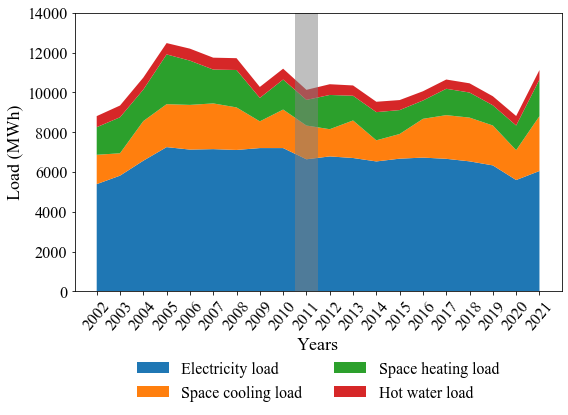

In [4]:
# Create a stacked area plot
plt.stackplot(years, electric_load, cooling_load, heat_load, hot_water_load,
              labels=['Electricity load', 'Space cooling load', 'Space heating load', 'Hot water load'],
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add title and axis labels
#plt.title('Load distribution of energy station supply', fontname='Times New Roman', fontsize=14, pad=9)
plt.xlabel('Years', fontname='Times New Roman', fontsize=18, labelpad=4)
plt.ylabel('Load (MWh)', fontname='Times New Roman', fontsize=18, labelpad=4)

# Format x-axis labels
plt.xticks(rotation=50)  # Rotate x-axis labels counterclockwise by 90 degrees
plt.xticks(range(min(years), max(years)+1, 1))  # Set x-axis tick positions to integer years with one-year interval

# Set y-axis range and interval
plt.ylim(0, 14000)
plt.yticks(range(0, 14001, 2000))

# Format y-axis labels as x1000
#formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1:.0f}')
#plt.gca().yaxis.set_major_formatter(formatter)

# Customize font settings
font_prop = font_manager.FontProperties(family='Times New Roman')

# Set font properties for x-axis and y-axis labels
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)

# Add legend and Set font properties for legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, prop={'size': 16, 'family': 'Times New Roman'})
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, prop={'size': 16, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(8, 6)  # Adjust the size as needed
plt.axvspan(2010.5, 2011.5,  facecolor='gray', alpha=0.5)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Energy station supply load.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# Display the figure
plt.show()

Electricity imported from grid and gas purchased distribution

In [5]:
df2 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='Purchased grid and gas', header=1)

In [6]:
#Extract data columns
# 设置字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

years = df2.iloc[:, 0].tolist()
electricity_data = df2.iloc[:, 1].tolist()
gas_data = df2.iloc[:, 2].tolist()

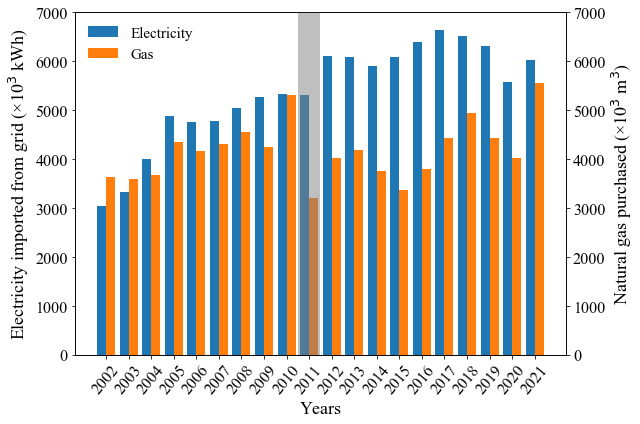

In [7]:
# Create a stacked area plot
fig, ax = plt.subplots()

#Set the position of the bar chart
bar_width = 0.4
index = np.arange(len(years))

#Draw a bar chart of purchasing electricity
ax.bar(index, electricity_data, bar_width, color='#1f77b4', label='Electricity')
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Electricity imported from grid (×10$^3$ kWh)', fontsize=18)
ax.tick_params(axis='y')
# 设置购电量y轴范围和刻度值
electricity_min = 0
electricity_max = 7000
electricity_tick_interval = 1000
ax.set_ylim(electricity_min, electricity_max)
ax.set_yticks(np.arange(electricity_min, electricity_max + electricity_tick_interval, electricity_tick_interval))
ax.set_yticklabels(['{:.0f}'.format(x/1) for x in ax.get_yticks()], fontsize=16)

#Draw a bar chart of gas purchased
ax2 = ax.twinx()
ax2.bar(index + bar_width, gas_data, bar_width, color='#ff7f0e', label='Gas')
ax2.set_ylabel(r'Natural gas purchased (×10$^3$ m$^3$)', fontsize=18)
ax2.tick_params(axis='y')
# 设置购气量y轴范围和刻度值
gas_min = 0
gas_max = 7000
gas_tick_interval = 1000
ax2.set_ylim(gas_min, gas_max)
ax2.set_yticks(np.arange(gas_min, gas_max + gas_tick_interval, gas_tick_interval))
ax2.set_yticklabels(['{:.0f}'.format(x/1) for x in ax2.get_yticks()], fontsize=16)
ax2.axvspan(8.7, 9.7, facecolor='gray', alpha=0.5)

#Adjust scale labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years, rotation=50, fontsize=16)

#Add Legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax.legend(handles, labels, loc='upper left',prop={'size': 15, 'family': 'Times New Roman'})
legend = ax.legend(handles, labels, loc='upper left',prop={'size': 15, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(9, 6)  # Adjust the size as needed

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Electricity imported & gas purchased.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# Display the figure
plt.show()

Distribution of electricity sources for the energy station

In [8]:
# 从Excel文件中读取数据
df3 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='Electricity sources', header=1)

In [9]:
# 提取数据列
years = df3.iloc[:, 0].tolist()
solar_data = df3.iloc[:, 1].tolist()
grid_data = df3.iloc[:, 2].tolist()
gas_turbine_data = df3.iloc[:, 3].tolist()
fuel_cell_data = df3.iloc[:, 4].tolist()

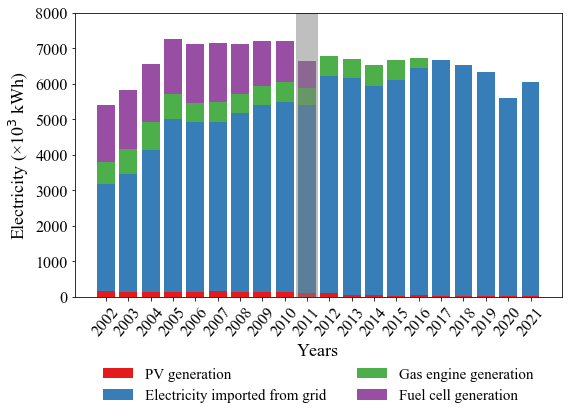

In [10]:
# 创建堆积柱状图
fig, ax = plt.subplots()

# 设置新罗马字体
prop = fm.FontProperties(family='Times New Roman')

colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3']
ax.bar(years, solar_data, color=colors[0], label='PV generation')
ax.bar(years, grid_data, bottom=solar_data, color=colors[1], label='Electricity imported from grid')
ax.bar(years, gas_turbine_data, bottom=[solar + grid for solar, grid in zip(solar_data, grid_data)],
        color=colors[2], label='Gas engine generation')
ax.bar(years, fuel_cell_data, bottom=[solar + grid + gas for solar, grid, gas in zip(solar_data, grid_data, gas_turbine_data)],
        color=colors[3], label='Fuel cell generation')

# 设置图例和标签
ax.set_xticks(years)
ax.set_xlabel('Years', fontproperties=prop, fontsize=18, labelpad=4)
ax.set_ylabel('Electricity (×10$^3$ kWh)', fontproperties=prop, fontsize=18)
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, prop={'size': 15, 'family': 'Times New Roman'})
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, prop={'size': 15, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Set the title
#ax.set_title('Distribution of electricity sources for the energy station', fontname='Times New Roman', fontsize=14, pad=9)

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(8, 6)  # Adjust the size as needed
plt.axvspan(2010.5, 2011.5,  facecolor='gray', alpha=0.5)

# 设置y轴刻度范围
ax.set_ylim(0, 8000)
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x / 1))
ax.yaxis.set_major_formatter(formatter)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Distribution of electricity sources for the energy station.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# 显示图像
plt.show()

Gas consumption

In [11]:
# 从Excel文件中读取数据
df4 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='Gas usage', header=1)

In [12]:
# 提取数据列
years = df4.iloc[:, 0].tolist()
boiler_data = df4.iloc[:, 1].tolist()
fuel_cell_data = df4.iloc[:, 2].tolist()
gas_turbine_data = df4.iloc[:, 3].tolist()
absorption_chill1_data = df4.iloc[:, 4].tolist()
absorption_chill2_data = df4.iloc[:, 5].tolist()
absorption_chill3_data = df4.iloc[:, 6].tolist()

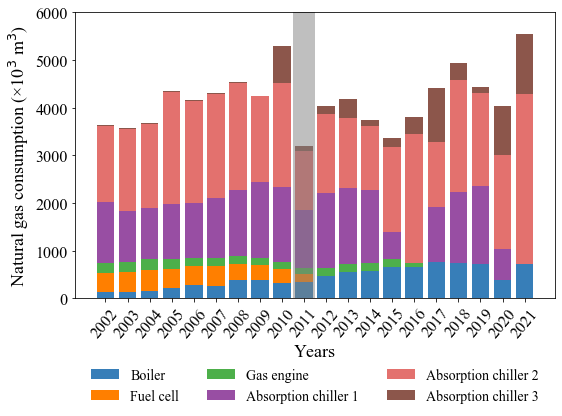

In [13]:
# 创建堆积柱状图
fig, ax = plt.subplots()

# 使用系统中已安装的Times New Roman字体
prop = fm.FontProperties(family='Times New Roman')

# 设置y轴标签的字体和字体大小
ax.set_ylabel('Natural gas consumption (×10$^3$ m$^3$)', fontproperties=prop, fontsize=18)

# 定义柱状图的颜色（Bright）
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#984ea3', '#e3716e', '#8c564b']

# 绘制堆积柱状图
ax.bar(years, boiler_data, color=colors[0], label='Boiler')
ax.bar(years, fuel_cell_data, bottom=boiler_data, color=colors[1], label='Fuel cell')
ax.bar(years, gas_turbine_data, bottom=[boiler + fuel_cell for boiler, fuel_cell in zip(boiler_data, fuel_cell_data)],
        color=colors[2], label='Gas engine')
ax.bar(years, absorption_chill1_data, bottom=[boiler + fuel_cell + gas_turbine for boiler, fuel_cell, gas_turbine in zip(boiler_data, fuel_cell_data, gas_turbine_data)],
        color=colors[3], label='Absorption chiller 1')
ax.bar(years, absorption_chill2_data, bottom=[boiler + fuel_cell + gas_turbine + absorption_chill1_data for boiler, fuel_cell, gas_turbine, absorption_chill1_data in zip(boiler_data, fuel_cell_data, gas_turbine_data, absorption_chill1_data)],
        color=colors[4], label='Absorption chiller 2')
ax.bar(years, absorption_chill3_data, bottom=[boiler + fuel_cell + gas_turbine + absorption_chill1_data + absorption_chill2_data for boiler, fuel_cell, gas_turbine, absorption_chill1_data, absorption_chill2_data in zip(boiler_data, fuel_cell_data, gas_turbine_data, absorption_chill1_data, absorption_chill2_data)],
        color=colors[5], label='Absorption chiller 3')

# 设置图例和标题的字体和字体大小
ax.set_xticks(years)
ax.set_xlabel('Years', fontproperties=prop, fontsize=18)
#ax.set_title('Distribution of gas sources for the energy station', fontproperties=prop, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# 设置x轴刻度标签的旋转角度和字体大小
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(8, 6)  # Adjust the size as needed

# 设置y轴刻度范围
ax.set_ylim(0, 6000)
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x / 1))
ax.yaxis.set_major_formatter(formatter)
plt.axvspan(2010.5, 2011.5,  facecolor='gray', alpha=0.5)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Distribution of gas sources for the energy station.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# 显示图像
plt.show()

Gas engine efficiency

In [14]:
# 从Excel文件中读取数据
df5 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='Gas engine', header=1)

In [15]:
# 提取数据列
years = df5.iloc[:, 0].tolist()
heat_efficiency = df5.iloc[:, 5].tolist()
electricity_efficiency = df5.iloc[:, 6].tolist()
total_efficiency = df5.iloc[:, 7].tolist()

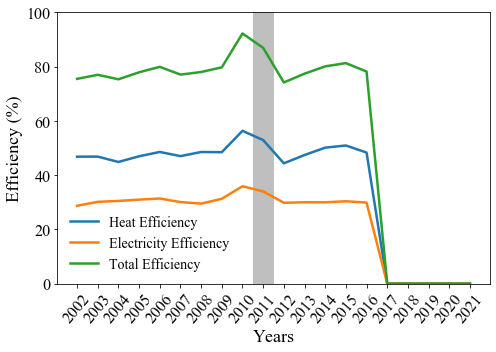

In [16]:
# 绘制折线图
plt.plot(years, heat_efficiency, linewidth=2.5, label='Heat Efficiency')
plt.plot(years, electricity_efficiency, linewidth=2.5, label='Electricity Efficiency')
plt.plot(years, total_efficiency, linewidth=2.5, label='Total Efficiency')

# Axis labels
#plt.title('Efficiency of Gas Turbine Over Time')
plt.xlabel('Years', fontname='Times New Roman', fontsize=18, labelpad=3)
plt.ylabel('Efficiency (%)', fontname='Times New Roman', fontsize=18, labelpad=3)

# Format x-axis labels
plt.xticks(rotation=50)  # Rotate x-axis labels counterclockwise by 90 degrees
plt.xticks(range(min(years), max(years)+1, 1))  # Set x-axis tick positions to integer years with one-year interval

# Set y-axis range and interval
plt.ylim(0, 100)
plt.yticks(range(0, 101, 20))

# Customize font settings
font_prop = font_manager.FontProperties(family='Times New Roman')

# Set font properties for x-axis and y-axis labels
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)

# Add legend and Set font properties for legend
plt.legend(prop={'size': 14, 'family': 'Times New Roman'})
legend = plt.legend(prop={'size': 14, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(7, 5)  # Adjust the size as needed
plt.axvspan(2010.5, 2011.5,  facecolor='gray', alpha=0.5)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Gas enginne efficiency.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# Display the figure
plt.show()

Fuel cell efficiency

In [17]:
# 从Excel文件中读取数据
df6 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='Fuel cell', header=1)

In [18]:
# 提取数据列
years = df6.iloc[:, 0].tolist()
heat_efficiency = df6.iloc[:, 5].tolist()
electricity_efficiency = df6.iloc[:, 6].tolist()
total_efficiency = df6.iloc[:, 7].tolist()

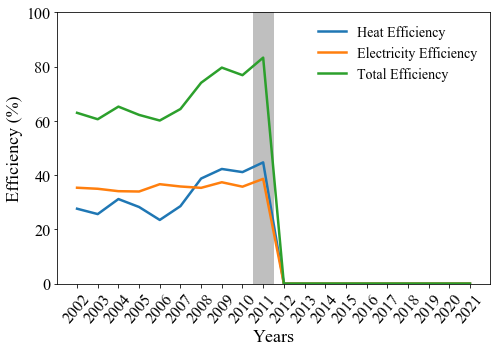

In [19]:
# 绘制折线图
plt.plot(years, heat_efficiency, linewidth=2.5, label='Heat Efficiency')
plt.plot(years, electricity_efficiency, linewidth=2.5, label='Electricity Efficiency')
plt.plot(years, total_efficiency, linewidth=2.5, label='Total Efficiency')

# Axis labels
#plt.title('Efficiency of Gas Turbine Over Time')
plt.xlabel('Years', fontname='Times New Roman', fontsize=18, labelpad=3)
plt.ylabel('Efficiency (%)', fontname='Times New Roman', fontsize=18, labelpad=3)

# Format x-axis labels
plt.xticks(rotation=50)  # Rotate x-axis labels counterclockwise by 90 degrees
plt.xticks(range(min(years), max(years)+1, 1))  # Set x-axis tick positions to integer years with one-year interval

# Set y-axis range and interval
plt.ylim(0, 100)
plt.yticks(range(0, 101, 20))

# Customize font settings
font_prop = font_manager.FontProperties(family='Times New Roman')

# Set font properties for x-axis and y-axis labels
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)

# Add legend and Set font properties for legend
plt.legend(prop={'size': 14, 'family': 'Times New Roman'})
legend = plt.legend(prop={'size': 14, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(7, 5)  # Adjust the size as needed
plt.axvspan(2010.5, 2011.5,  facecolor='gray', alpha=0.5)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Fuel cell efficiency.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# Display the figure
plt.show()

Gas engine and Fuel cell data in 2009

In [88]:
# 从Excel文件中读取数据
df7 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Electricity load & Heating load & Cooling load & Hot water load.xlsx', sheet_name='2009', header=1)

In [89]:
days = df7.iloc[:, 0]
heat_efficiency = df7.iloc[:, 1]
electric_efficiency = df7.iloc[:, 2]
total_efficiency = df7.iloc[:, 3]

In [90]:
heat_efficiency1 = df7.iloc[1:232, 7]
electric_efficiency1 = df7.iloc[1:232, 8]
total_efficiency1 = df7.iloc[1:232, 9]

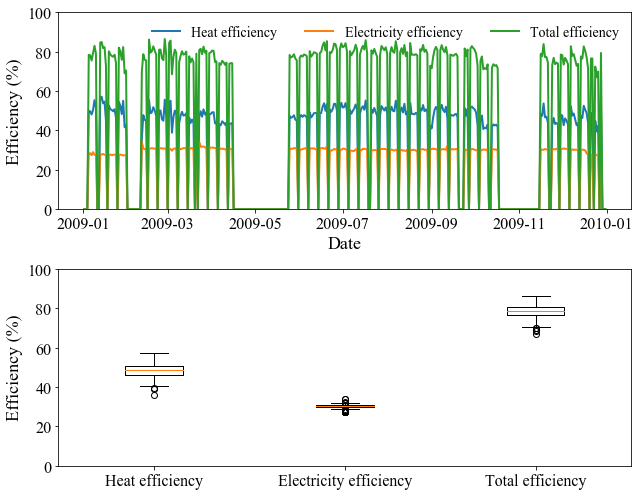

In [91]:
# 将日期转换为日期时间格式
days = pd.to_datetime(days)

# 创建子图布局
fig, axs = plt.subplots(2, 1, figsize=(9, 7))

# 绘制折线图
axs[0].plot(days, heat_efficiency, linewidth=2, label='Heat efficiency')
axs[0].plot(days, electric_efficiency, linewidth=2, label='Electricity efficiency')
axs[0].plot(days, total_efficiency, linewidth=2, label='Total efficiency')
axs[0].set_xlabel('Date', fontsize=18)
axs[0].set_ylabel('Efficiency (%)', fontsize=18)
#axs[0].set_title('Efficiency Variation')
axs[0].legend(loc='upper right',ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
axs[0].set_ylim(0, 100)
axs[0].set_yticks(range(0, 101, 20))
legend = axs[0].legend(loc='upper right',ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# 绘制箱线图
efficiency_data_1 = [heat_efficiency1, electric_efficiency1, total_efficiency1]
boxprops = dict(linewidth=1) 
axs[1].boxplot(efficiency_data_1, boxprops=boxprops)
axs[1].set_xticklabels(['Heat efficiency', 'Electricity efficiency', 'Total efficiency'], fontsize=18)
axs[1].set_ylabel('Efficiency (%)', fontsize=18)
#axs[1].set_title('Efficiency Boxplot')
axs[1].set_ylim(0, 100)
axs[1].set_yticks(range(0, 101, 20))

for ax in axs:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

# 调整子图之间的间距
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Gas engine efficiency_2009.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# 显示图形
plt.show()

Fuel cell efficiency in 2010

In [100]:
days = df7.iloc[:, 0]
heat_efficiency = df7.iloc[:, 4]
electric_efficiency = df7.iloc[:, 5]
total_efficiency = df7.iloc[:, 6]

In [101]:
heat_efficiency2 = df7.iloc[1:335, 10]
electric_efficiency2 = df7.iloc[1:335, 11]
total_efficiency2 = df7.iloc[1:335, 12]

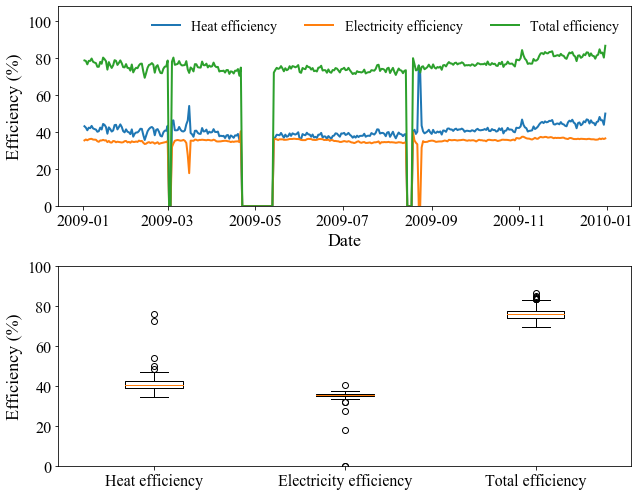

In [102]:
# 将日期转换为日期时间格式
days = pd.to_datetime(days)

# 创建子图布局
fig, axs = plt.subplots(2, 1, figsize=(9, 7))

# 绘制折线图
axs[0].plot(days, heat_efficiency, linewidth=2, label='Heat efficiency')
axs[0].plot(days, electric_efficiency, linewidth=2, label='Electricity efficiency')
axs[0].plot(days, total_efficiency, linewidth=2, label='Total efficiency')
axs[0].set_xlabel('Date', fontsize=18)
axs[0].set_ylabel('Efficiency (%)', fontsize=18)
#axs[0].set_title('Efficiency Variation')
axs[0].legend(loc='upper right',ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
axs[0].set_ylim(0, 108)
axs[0].set_yticks(range(0, 108, 20))
legend = axs[0].legend(loc='upper right',ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# 绘制箱线图
efficiency_data_2 = [heat_efficiency2, electric_efficiency2, total_efficiency2]
boxprops = dict(linewidth=1) 
axs[1].boxplot(efficiency_data_2, boxprops=boxprops)
axs[1].set_xticklabels(['Heat efficiency', 'Electricity efficiency', 'Total efficiency'], fontsize=18)
axs[1].set_ylabel('Efficiency (%)', fontsize=18)
#axs[1].set_title('Efficiency Boxplot')
axs[1].set_ylim(0, 100)
axs[1].set_yticks(range(0, 101, 20))

for ax in axs:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

# 调整子图之间的间距
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)

# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Fuel cell efficiency_2009.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')

# 显示图形
plt.show()